### 4. Detailed Explanation of Self-Attention

**The Idea**:  
In self-attention, every token in the input sequence looks at every other token and decides how much "attention" to pay to each one. This is done by computing a weighted sum of all the value vectors, where the weights come from how similar each query token is to each key token.

**Core Components**:  
- **Input Representation**: Suppose we have a sequence of tokens, each represented by a vector embedding. Let’s say we have `N` tokens, each embedding dimension is `d_model`.
- **Linear Projections**: For self-attention, we start with an input matrix `X` of shape `(N, d_model)`, where each row corresponds to an embedding of a token. From `X`, we create three new matrices:
  1. **Queries (Q)**: `Q = XW_Q`
  2. **Keys (K)**: `K = XW_K`
  3. **Values (V)**: `V = XW_V`
  
  Here, `W_Q`, `W_K`, and `W_V` are parameter matrices of shape `(d_model, d_k)`, `(d_model, d_k)`, `(d_model, d_v)` respectively, often with `d_k = d_v = d_model/num_heads` if you’re using multi-head attention. For simplicity, assume `d_k = d_v = d_model`.

- **Similarity Scores**: To determine how much each token should attend to every other token, we compute a similarity (or compatibility) score between queries and keys.  
  For each query `q_i` (a row in Q) and each key `k_j` (a row in K), we calculate the score:  
  \[
  \text{score}(q_i, k_j) = q_i \cdot k_j^T
  \]

  If Q is `(N, d_k)` and K is `(N, d_k)`, then `QK^T` is `(N, N)`, giving you a matrix of scores for every query-key pair.

- **Scaling**: These raw scores are divided by \(\sqrt{d_k}\) to prevent the scores from getting too large as `d_k` grows. This helps stabilize training.
  
  So we get:
  \[
  \text{scaled\_scores} = \frac{QK^T}{\sqrt{d_k}}
  \]

- **Softmax**: We apply a softmax function to these scaled scores across the key dimension. This converts the scores into a probability distribution for each query token over all key tokens:
  \[
  \text{attention\_weights} = \text{softmax}(\text{scaled\_scores}, \text{axis}=\text{keys})
  \]

  After this step, each row in `attention_weights` corresponds to how much a particular query token focuses on each token in the input sequence.

- **Weighted Sum of Values**: Finally, we use these attention weights to produce a weighted sum of the value vectors:
  \[
  \text{attention\_output} = \text{attention\_weights} \times V
  \]

  This yields an `(N, d_v)` matrix, where each row is a contextualized representation of the corresponding token.

**In short**:  
1. Compute Q, K, V from input X.  
2. Calculate raw scores = QK^T.  
3. Scale by \(\sqrt{d_k}\).  
4. Apply softmax to get attention weights.  
5. Multiply attention weights by V to get the final output.

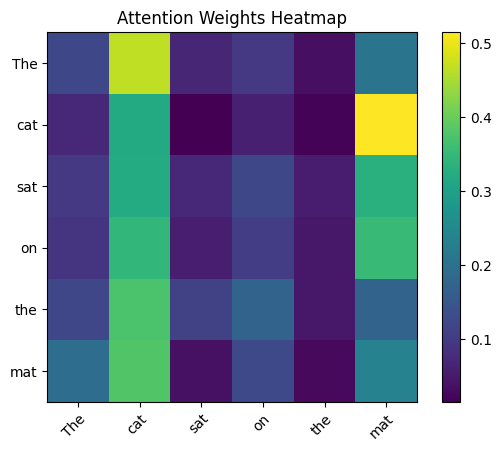

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Our sentence and tokens
tokens = ["The", "cat", "sat", "on", "the", "mat"]
N = len(tokens)        # Number of tokens
d_model = 8            # Embedding size
d_k = d_model          # For simplicity, let d_k = d_model
d_v = d_model

# 2. Create a random embedding for each token (In practice, use a real embedding model)
np.random.seed(42)  # For reproducibility
X = np.random.rand(N, d_model)

# 3. Create random weight matrices W_Q, W_K, W_V
W_Q = np.random.randn(d_model, d_k)
W_K = np.random.randn(d_model, d_k)
W_V = np.random.randn(d_model, d_v)

# Compute Q, K, V
Q = X.dot(W_Q)  # Shape (N, d_k)
K = X.dot(W_K)  # Shape (N, d_k)
V = X.dot(W_V)  # Shape (N, d_v)

# 4. Compute the attention scores: QK^T
scores = Q.dot(K.T)  # (N, N)

# Scale by sqrt(d_k)
scores = scores / np.sqrt(d_k)

# 5. Softmax function
def softmax(x, axis=-1):
    x_exp = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return x_exp / np.sum(x_exp, axis=axis, keepdims=True)

# Compute attention weights
attention_weights = softmax(scores, axis=1)  # Each row sums to 1

# 6. Compute final attention output
attention_output = attention_weights.dot(V)

# 7. Visualize the attention weights
# Rows represent query tokens, columns represent keys
fig, ax = plt.subplots()
im = ax.imshow(attention_weights, cmap='viridis')

# Set tick labels to tokens
ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(N))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Attention Weights Heatmap")
fig.colorbar(im, ax=ax)
plt.show()